In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from datetime import datetime, date
import glob

# Import Data

In [2]:
file_paths = glob.glob("tweets_*.csv")
data = pd.concat((pd.read_csv(file) for file in file_paths), ignore_index=True)

# Drop duplicates
data.drop_duplicates(subset=['Tweet', 'Date'], inplace=True)

# Clean up data: remove special characters, extra whitespaces, and lowercasing the text in "tweet" column
data.rename(columns={"Tweet": "tweet"}, inplace=True)

# Display the cleaned data
data

,tweet,Date
0,Read More: https://azaadenglish.com/akhtar-men...,2024-10-17
1,Stop this abduction politics.\n & \n#ReleaseIn...,2024-10-17
2,The ramifications of the controversial re-inte...,2024-10-16
3,"Wahid Qamber Baloch, a prominent Baloch politi...",2024-10-17
4,The abduction of Baloch students from Gulshan-...,2024-10-17
...,...,...
11434,Totally agree. Reserve the outrage for his com...,2024-10-13
11435,It’s unclear whether his arrest can generate f...,2024-10-17
11436,The international community must act to end th...,2024-10-17
11437,The problems of this poisonous strain of thoug...,2024-10-15


In [3]:
data.isna().sum()

tweet    0
Date     0
dtype: int64

# Preprocessing

**Emoji detection**

In [4]:
import string
punct = set(string.punctuation)
print(punct)

{'`', '}', ',', '&', '\\', '>', '<', "'", '@', ':', '!', '=', '.', ')', '+', '~', '{', '"', '|', '[', ';', '*', '(', '-', ']', '_', '/', '#', '^', '$', '?', '%'}


In [5]:
emoji = set()
for s in data['tweet'].fillna('').astype(str):
    for c in s:
        if c.isdigit() or c.isalpha() or c.isalnum() or c.isspace() or c in punct:
            continue
        emoji.add(c)
        
print(''.join(emoji))

˂♡़〜］⎜็ौ؟ّो⸜ุ「₹ॉ‟́ெं︎ี？˃…×ೇ➫•［，ิً’§‌°ि−」！¿ึೊ¡”ेँा·்„。َ━่＼｡“´♪★●ूั➜⁩፠』｀）⁦್ื‍–｜⁧￼ٰ♥（»€—۔＆⎯】ಾ、้→ُ➤¨์«।،⸝■ु​ை‘▽‑፣ٌ／®【『ै्¥™ู️ी፤・◆£❥⮕


**Dowload Stopword**

#Data Cleaning

Data Cleaning adalah proses mendeteksi dan memperbaiki catatan yang korup, tidak akurat,atau tidak relevan dari data, kemudian mengganti, memodifikasi, atau menghapus data yang kotor tersebut. 

In [6]:
data['tweet']=data['tweet'].apply(str)

**Remove URL**

In [7]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

'New competition launched :'

In [8]:
data['tweet'] = data['tweet'].apply(lambda x : remove_URL(x))

**Remove Emoji**

In [9]:
import string
punct = set(string.punctuation)
print(punct)

{'`', '}', ',', '&', '\\', '>', '<', "'", '@', ':', '!', '=', '.', ')', '+', '~', '{', '"', '|', '[', ';', '*', '(', '-', ']', '_', '/', '#', '^', '$', '?', '%'}


In [10]:
emoji = set()
symbol = 'ðŸ˜â\x81£â\x81£'
for s in data['tweet'].fillna('').astype(str):
    for c in s:
        if c.isdigit() or c.isalpha() or c.isalnum() or c.isspace() or c in punct:
            continue
        emoji.add(c)

for s in symbol:
  emoji.add(s)

print(''.join(emoji))

˂♡़〜］⎜็ौ؟ّो⸜ุ「₹ॉ‟ð́ெं︎ี？˃…×ೇ➫•［，ิً’§‌°ि−」！¿ึೊ¡”ेँा˜·்„。َ━่＼｡“´♪★●ूั➜⁩፠』｀）⁦್ื‍–｜⁧￼ٰ♥（»€—۔＆⎯】ಾ、้→ُ➤¨์«।،⸝■ु​ைâ‘▽‑፣ٌ／®【『ै्¥™ูŸ️ी፤・◆£❥⮕


In [11]:
def remove_emoji(text):
  temp = ''
  for c in text:
    if c not in emoji:
      temp += c
  
  return temp
  
remove_emoji('Semainya satu, tumbuhnya dua.. ðŸ˜…â£â£ Kalo dijual perpohon bisa menang banyak ini ðŸ˜ðŸ˜â£.â£.â£.')

'Semainya satu, tumbuhnya dua..  Kalo dijual perpohon bisa menang banyak ini ...'

In [12]:
data['tweet'] = data['tweet'].apply(lambda x : remove_emoji(x))

**Remove Hastag**

In [13]:
#https://ichi.pro/id/membersihkan-data-teks-dengan-python-200778039524214

def remove_hastag(x):
  x = re.sub(r'#\S+', ' ', x)
  return x

print(remove_hastag('kalo dijual perpohon...#simpleplanthidroponik #simpleplantbyyuka #simpleplant #selada'))

kalo dijual perpohon...       


In [14]:
data['tweet'] = data['tweet'].apply(lambda x : remove_hastag(x))

**Remove Punctuation**

In [15]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [16]:
data['tweet'] = data['tweet'].apply(lambda x : remove_punct(x))

**Make Lower**

In [17]:
data['tweet'] = data['tweet'].apply(lambda x : x.lower())

In [18]:
data

,tweet,Date
0,read more \n,2024-10-17
1,stop this abduction politics\n \n \n \n,2024-10-17
2,the ramifications of the controversial reinter...,2024-10-16
3,wahid qamber baloch a prominent baloch politic...,2024-10-17
4,the abduction of baloch students from gulshane...,2024-10-17
...,...,...
11434,totally agree reserve the outrage for his comm...,2024-10-13
11435,its unclear whether his arrest can generate fr...,2024-10-17
11436,the international community must act to end th...,2024-10-17
11437,the problems of this poisonous strain of thoug...,2024-10-15


In [19]:
data.isna().sum()

tweet    0
Date     0
dtype: int64

In [20]:
data = data.drop_duplicates(subset=['tweet'])
data['tweet'] = data['tweet'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
data['tweet'] = data['tweet'].str.strip()
data['tweet'] = data['tweet'].str.lower()

C:\Users\MYPC PRO L7V\AppData\Local\Temp\ipykernel_15240\2446225167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
C:\Users\MYPC PRO L7V\AppData\Local\Temp\ipykernel_15240\2446225167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].str.strip()
C:\Users\MYPC PRO L7V\AppData\Local\Temp\ipykernel_15240\2446225167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [21]:
data.to_csv ('data.csv', index = None, header=True) 

In [22]:
data

,tweet,Date
0,read more,2024-10-17
1,stop this abduction politics,2024-10-17
2,the ramifications of the controversial reinter...,2024-10-16
3,wahid qamber baloch a prominent baloch politic...,2024-10-17
4,the abduction of baloch students from gulshane...,2024-10-17
...,...,...
11434,totally agree reserve the outrage for his comm...,2024-10-13
11435,its unclear whether his arrest can generate fr...,2024-10-17
11436,the international community must act to end th...,2024-10-17
11437,the problems of this poisonous strain of thoug...,2024-10-15


# Keyword Country Names

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
# Load the ACLED data
acled_data = pd.read_csv('../2021-10-19-2024-11-01.csv')

acled_data.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,MEX94321,18 October 2024,2024,2,Strategic developments,Strategic developments,Looting/property destruction,Military Forces of Mexico (2018-),NaN,State forces,Unidentified Gang (Mexico),NaN,Political militia,State forces-Political militia,NaN,484,North America,Mexico,Michoacan de Ocampo,Lazaro Cardenas,NaN,Coast of Lazaro Cardenas,17.8304,-102.1959,2,La Voz de Michoacan,Subnational,Property destruction: Around 18 October 2024 (...,0,NaN,1729545343
1,BOL6472,18 October 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Bolivia),MAS-IPSP: Movement for Socialism-Political Ins...,Protesters,NaN,NaN,NaN,Protesters only,NaN,68,South America,Bolivia,Cochabamba,Chapare,Villa Tunari,Locotal,-17.1886,-65.8046,1,Bolivia.com; El Diario (Bolivia),National,"On 18 October 2024, in Locotal (Cochabamba), f...",0,crowd size=no report,1729545348
2,YEM92779,18 October 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,NaN,NaN,NaN,Protesters only,NaN,887,Middle East,Yemen,Ibb,Far Al Udayn,NaN,Uzlat Al Aqibah,13.8786,43.7357,2,Yemen News Agency (SABA) - Houthi,National,"On 18 October 2024, protesters held a large Ho...",0,crowd size=large,1729545353
3,YEM92780,18 October 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,NaN,NaN,NaN,Protesters only,NaN,887,Middle East,Yemen,Ibb,Hazm Al Udayn,NaN,Al Junayd,14.0842,44.0575,1,Yemen News Agency (SABA) - Houthi,National,"On 18 October 2024, protesters held a large Ho...",0,crowd size=large,1729545353
4,YEM92783,18 October 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,NaN,NaN,NaN,Protesters only,NaN,887,Middle East,Yemen,Ibb,Hazm Al Udayn,NaN,Uzlat Al Ajum,14.0936,43.9495,2,Yemen News Agency (SABA) - Houthi,National,"On 18 October 2024, protesters held a large Ho...",0,crowd size=large,1729545353


In [25]:
# Get unique country names from the 'country' column in the ACLED data
unique_countries = acled_data['country'].unique()

# Display unique country names to use for the location keywords
unique_countries

array(['Mexico', 'Bolivia', 'Yemen', 'Argentina', 'Bahrain', 'Brazil',
       'Cameroon', 'Chile', 'Colombia', 'Dominican Republic',
       'Democratic Republic of Congo', 'Ethiopia', 'Ghana', 'Guatemala',
       'Honduras', 'Haiti', 'Iran', 'Iraq', 'Israel', 'Jamaica', 'Jordan',
       'Kenya', 'Lebanon', 'Libya', 'Mali', 'Morocco', 'Nigeria', 'Peru',
       'Puerto Rico', 'Palestine', 'South Africa', 'Somalia', 'Sudan',
       'Syria', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uganda',
       'Venezuela', 'Russia', 'Indonesia', 'India', 'Ireland', 'Italy',
       'Kazakhstan', 'South Korea', 'Moldova', 'North Macedonia',
       'Myanmar', 'Malaysia', 'Nepal', 'Netherlands', 'Pakistan',
       'Philippines', 'Portugal', 'Sri Lanka', 'Sweden', 'Thailand',
       'Taiwan', 'Ukraine', 'United States', 'Kosovo', 'Afghanistan',
       'Albania', 'Australia', 'Bangladesh', 'Belarus', 'Canada',
       'Germany', 'Spain', 'Finland', 'Fiji', 'France', 'United Kingdom',
       'Greece', 'Alg

In [26]:
# Get unique country names from the 'region' column in the ACLED data
unique_regions = acled_data['region'].unique()

# Display unique region names to use for the location keywords
unique_regions

array(['North America', 'South America', 'Middle East', 'Middle Africa',
       'Caribbean', 'Eastern Africa', 'Western Africa', 'Central America',
       'Northern Africa', 'Southern Africa', 'Europe', 'Southeast Asia',
       'South Asia', 'Caucasus and Central Asia', 'East Asia', 'Oceania',
       'Antarctica'], dtype=object)

In [27]:
# Get unique country names from the 'region' column in the ACLED data
unique_location = acled_data['location'].unique()

# Display unique region names to use for the location keywords
unique_location

array(['Coast of Lazaro Cardenas', 'Locotal', 'Uzlat Al Aqibah', ...,
       'Paramillo', 'Kottaipattanam', 'Enniscorthy'], dtype=object)

In [28]:
# Define a list of relevant country or region keywords for extraction
location_keywords = [
    "gaza", "israel", "ukraine", "russia", "syria", "afghanistan", "iraq", "iran",
    "yemen", "lebanon", "palestine", "libya", "egypt", "turkey", "saudi arabia",
    "jordan", "pakistan", "india", "china", "usa", "canada", "france", "germany", "uk", 
    "nigeria", "south africa", "sudan", "somalia", "venezuela", "colombia", "mexico", 
    "brazil", "argentina", "peru",'Mexico', 'Bolivia', 'Yemen', 'Argentina', 'Bahrain', 'Brazil',
       'Cameroon', 'Chile', 'Colombia', 'Dominican Republic',
       'Democratic Republic of Congo', 'Ethiopia', 'Ghana', 'Guatemala',
       'Honduras', 'Haiti', 'Iran', 'Iraq', 'Israel', 'Jamaica', 'Jordan',
       'Kenya', 'Lebanon', 'Libya', 'Mali', 'Morocco', 'Nigeria', 'Peru',
       'Puerto Rico', 'Palestine', 'South Africa', 'Somalia', 'Sudan',
       'Syria', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uganda',
       'Venezuela', 'Russia', 'Indonesia', 'India', 'Ireland', 'Italy',
       'Kazakhstan', 'South Korea', 'Moldova', 'North Macedonia',
       'Myanmar', 'Malaysia', 'Nepal', 'Netherlands', 'Pakistan',
       'Philippines', 'Portugal', 'Sri Lanka', 'Sweden', 'Thailand',
       'Taiwan', 'Ukraine', 'United States', 'Kosovo', 'Afghanistan',
       'Albania', 'Australia', 'Bangladesh', 'Belarus', 'Canada',
       'Germany', 'Spain', 'Finland', 'Fiji', 'France', 'United Kingdom',
       'Greece', 'Algeria', 'Burkina Faso', 'Ecuador', 'Mauritania',
       'Madagascar', 'Mozambique', 'Nicaragua', 'Panama', 'Paraguay',
       'Sierra Leone', 'El Salvador', 'South Sudan', 'Uruguay', 'Japan',
       'Kyrgyzstan', 'Poland', 'North Korea', 'Romania', 'Uzbekistan',
       'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Estonia',
       'French Guiana', 'Egypt', 'Benin', 'Burundi',
       'Central African Republic', 'Cape Verde', 'Costa Rica', 'Cuba',
       'Dominica', 'Senegal', 'New Zealand', 'Latvia', 'Maldives',
       'Malta', 'New Caledonia', 'Norway', 'Papua New Guinea', 'Reunion',
       'Serbia', 'Bulgaria', 'China', 'Croatia', 'Angola', 'Guinea',
       'Niger', 'eSwatini', 'Iceland', 'Montenegro', 'Martinique',
       'Slovenia', 'Armenia', 'Cyprus', 'Chad', 'Malawi', 'Mayotte',
       'Slovakia', 'Azerbaijan', 'Guadeloupe', 'Belize', 'Liberia',
       'Lithuania', 'Georgia', 'Switzerland', 'Namibia', 'Suriname',
       'French Polynesia', 'Guyana', 'Rwanda', 'Denmark',
       'Czech Republic', 'Ivory Coast', 'Saint Lucia', 'Hungary',
       'Cambodia', 'Gabon', 'Mauritius', 'Luxembourg', 'Singapore',
       'Djibouti', 'Mongolia', 'Guinea-Bissau', 'Eritrea', 'Togo',
       'Monaco', 'Zimbabwe', 'Tanzania', 'East Timor', 'Comoros',
       'Cook Islands', 'Lesotho', 'Curacao', 'Wallis and Futuna',
       'Botswana', 'Zambia', 'Bahamas', 'Antigua and Barbuda', 'Guam',
       'Tonga', 'Kiribati', 'Sint Maarten', 'Saudi Arabia', 'Bhutan',
       'Seychelles', 'Sao Tome and Principe', 'Greenland', 'Vietnam',
       'United Arab Emirates', 'Oman', 'Gambia', 'Saint-Barthelemy',
       'Saint Pierre and Miquelon', 'Kuwait', 'Tajikistan',
       'Republic of Congo', 'Bermuda', 'Vanuatu',
       'Northern Mariana Islands', 'Anguilla', 'Antarctica',
       'Saint-Martin', 'Solomon Islands', 'Bailiwick of Guernsey',
       'Faroe Islands', 'San Marino', 'Liechtenstein', 'Andorra',
       'Marshall Islands', 'Vatican City', 'Barbados',
       'Saint Vincent and the Grenadines', 'Tuvalu', 'Samoa', 'Qatar',
       'Turkmenistan', 'Grenada', 'Turks and Caicos Islands', 'Brunei',
       'Aruba', 'Nauru', 'Cayman Islands', 'Laos',
       'Caribbean Netherlands', 'Gibraltar', 'Niue',
       'Saint Kitts and Nevis', 'Equatorial Guinea', 'Micronesia',
       'Tokelau', 'American Samoa', 'British Virgin Islands',
       'Isle of Man', 'Montserrat', 'Christmas Island',
       'Bailiwick of Jersey', 'Falkland Islands'
]

# Create a function to extract location keywords present in each tweet
def extract_location(tweet_text, keywords):
    # Check if any keyword is present in the tweet and return it
    found_keywords = [keyword for keyword in keywords if keyword in tweet_text.lower()]
    return found_keywords if found_keywords else None

# Apply the function to each tweet in the DataFrame and create a new column for extracted locations
data['locations'] = data['tweet'].apply(lambda text: extract_location(text, location_keywords))

# Filter only tweets that have a location keyword (non-null entries in 'locations' column)
tweets_with_locations = data.dropna(subset=['locations']).reset_index(drop=True)

# Display the first few rows of the tweets with extracted locations
tweets_with_locations

C:\Users\MYPC PRO L7V\AppData\Local\Temp\ipykernel_15240\3930179882.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locations'] = data['tweet'].apply(lambda text: extract_location(text, location_keywords))


,tweet,Date,locations
0,in just one week eighteen baloch individuals h...,2024-10-17,[pakistan]
1,english subtitles\n\nin an effort to give paki...,2024-10-17,[pakistan]
2,3 thousand hours 2 lac minutes 11 million sec...,2023-09-09,[usa]
3,wahid kambar is a war prisoner and council of ...,2024-09-21,"[iran, pakistan]"
4,kerala high court dismissed the plea of the su...,2024-10-14,[india]
...,...,...,...
3426,dont worry we are here to cleanse you from the...,2022-04-03,"[russia, uk]"
3427,the oxford english dictionary widely regarded ...,2024-10-17,[israel]
3428,the united states is deeply concerned by the s...,2023-10-31,[israel]
3429,why is it that radical israelis are not referr...,2024-10-12,[israel]


In [51]:
tweets_with_locations.to_csv("sample_tweets_by_locations.csv", index=False)

C:\Users\MYPC PRO L7V\AppData\Local\Temp\ipykernel_15240\3360901171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


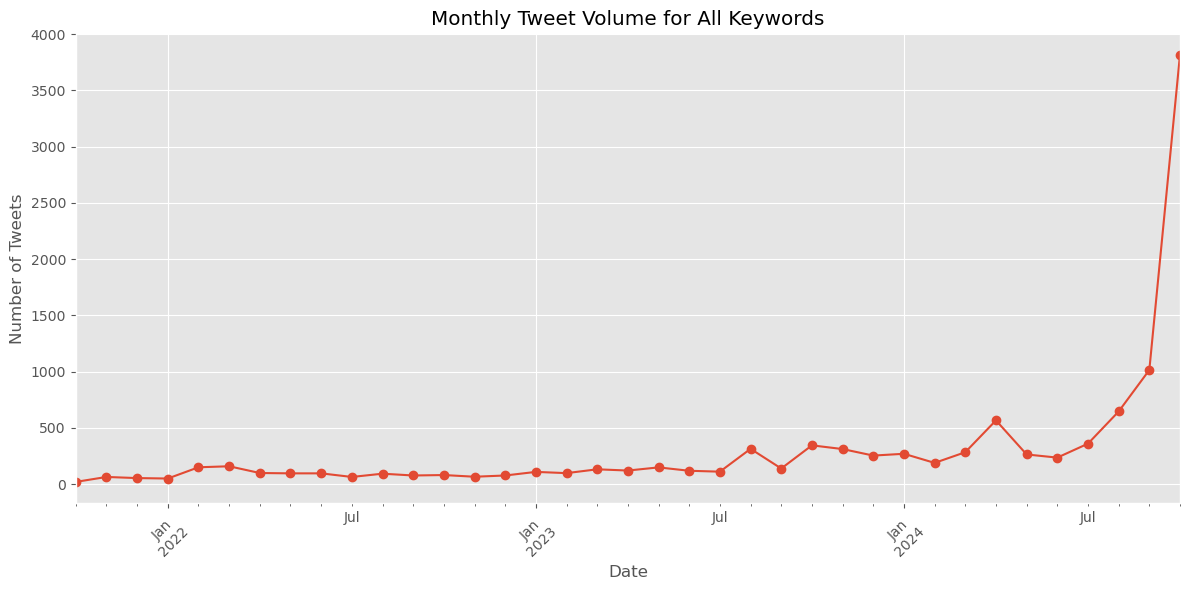

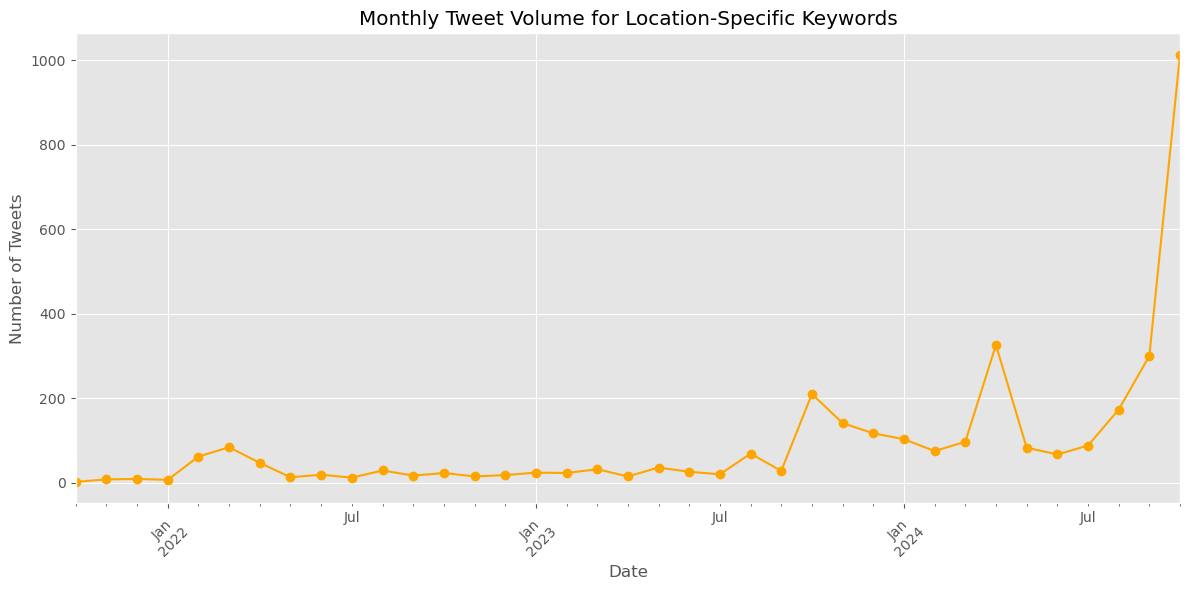

In [29]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format for easier time-based analysis
data['Date'] = pd.to_datetime(data['Date'])

# Primary Analysis: Temporal Analysis for All Tweets

# Group tweets by date to get tweet counts over time
tweet_counts_all = data.groupby(data['Date'].dt.to_period('M')).size()

# Plot the tweet volume over time
plt.figure(figsize=(12, 6))
tweet_counts_all.plot(kind='line', marker='o', title="Monthly Tweet Volume for All Keywords")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Secondary Analysis: Temporal Analysis for Location-specific Tweets

# Filter tweets that have identified locations
tweets_with_locations['Date'] = pd.to_datetime(tweets_with_locations['Date'])

# Group location-specific tweets by date to get tweet counts over time
tweet_counts_location = tweets_with_locations.groupby(tweets_with_locations['Date'].dt.to_period('M')).size()

# Plot the location-specific tweet volume over time
plt.figure(figsize=(12, 6))
tweet_counts_location.plot(kind='line', marker='o', color='orange', title="Monthly Tweet Volume for Location-Specific Keywords")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


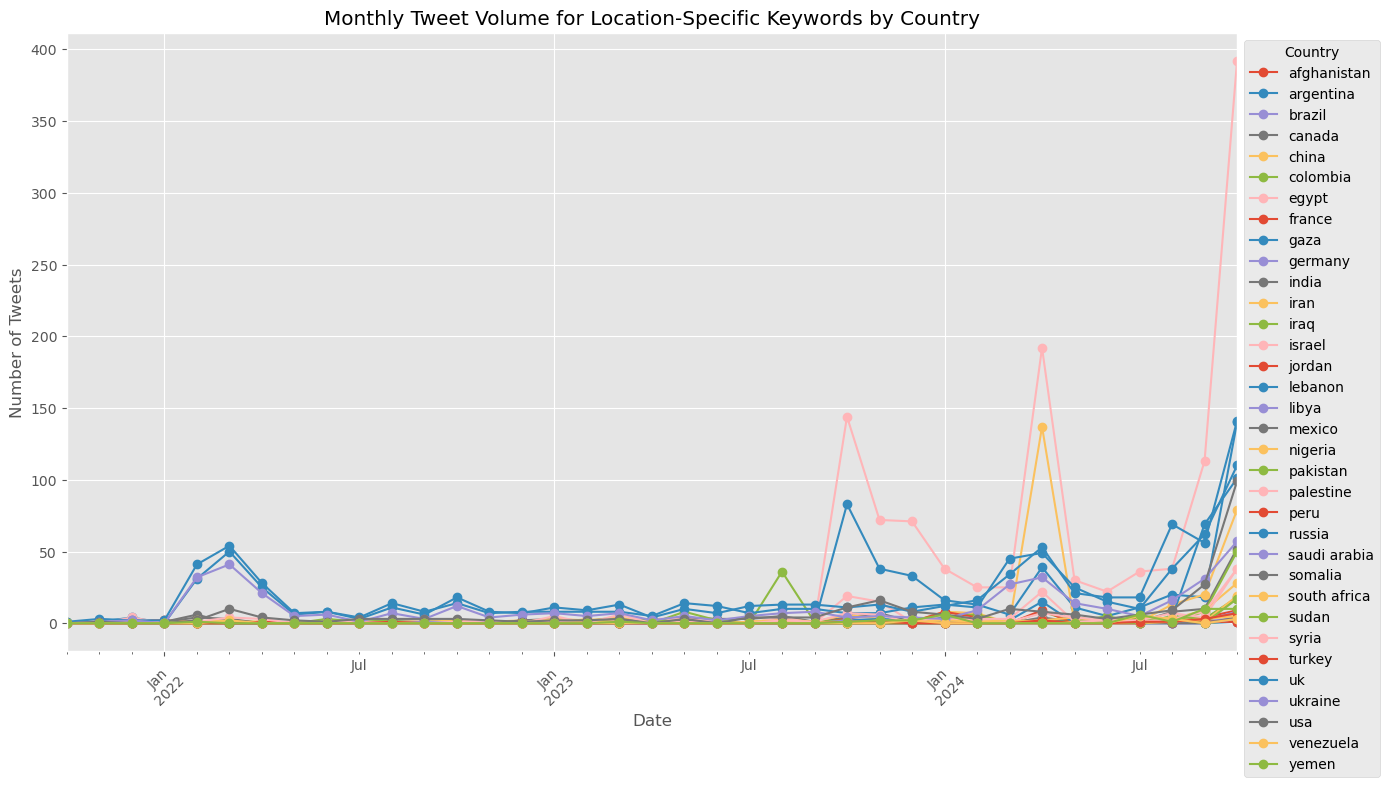

In [30]:
# Secondary Analysis with Location-Specific Visualization

# Ensure 'data' and 'tweets_with_locations' contain the necessary columns
# First, re-checking that 'Date' column is in datetime format
tweets_with_locations['Date'] = pd.to_datetime(tweets_with_locations['Date'])

# Extract individual countries from the 'locations' list and expand them
tweets_with_locations_expanded = tweets_with_locations.explode('locations')

# Group tweets by date and location to get tweet counts over time for each location
tweet_counts_location_by_country = tweets_with_locations_expanded.groupby([tweets_with_locations_expanded['Date'].dt.to_period('M'), 'locations']).size().unstack().fillna(0)

# Plot the tweet volume over time, separated by location
plt.figure(figsize=(14, 8))
tweet_counts_location_by_country.plot(kind='line', marker='o', title="Monthly Tweet Volume for Location-Specific Keywords by Country", ax=plt.gca())
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Country")
plt.tight_layout()
plt.show()


In [50]:
tweets_with_locations_expanded

,tweet,Date,locations
0,in just one week eighteen baloch individuals h...,2024-10-17,pakistan
1,english subtitles\n\nin an effort to give paki...,2024-10-17,pakistan
2,3 thousand hours 2 lac minutes 11 million sec...,2023-09-09,usa
3,wahid kambar is a war prisoner and council of ...,2024-09-21,iran
3,wahid kambar is a war prisoner and council of ...,2024-09-21,pakistan
4,kerala high court dismissed the plea of the su...,2024-10-14,india
5,if you reside in odukpani lga im crs and have ...,2024-10-07,uk
6,in this video a hindu woman is abducted in day...,2022-08-27,pakistan
7,sahil kumar has been kidnapped from kandhra su...,2023-03-24,uk
8,big breaking news mohammad aamir a tuition tea...,2022-11-25,usa


In [49]:
tweets_with_locations_expanded.to_csv("sample_tweets_by_location.csv", index=False)

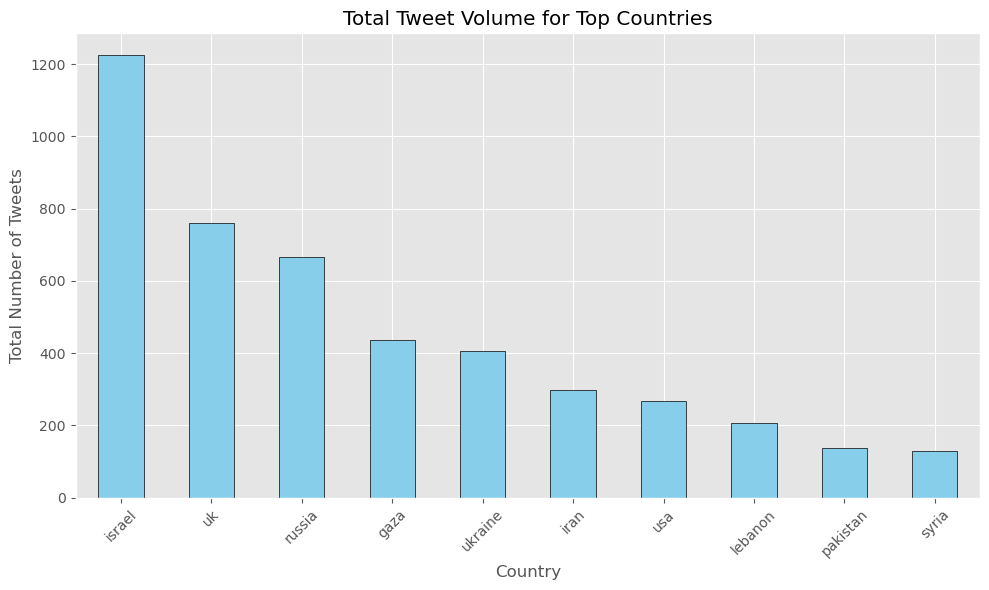

In [31]:
# Bar chart to show total tweet volume for each country with higher volume

# Calculate the total tweet volume per country by summing across all months
total_tweet_counts_per_country = tweet_counts_location_by_country.sum()

# Filter to display only countries with a significant number of tweets (e.g., top 10 countries by volume)
top_countries = total_tweet_counts_per_country.sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black', title="Total Tweet Volume for Top Countries")
plt.xlabel("Country")
plt.ylabel("Total Number of Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Sentiment Analyst 

In [32]:
from textblob import TextBlob

# List of keywords indicating negative or violent context
negative_keywords = ["attack", "riot", "violence", "protest", "clash", "conflict", "explosion", "war", "bomb", 
                     "kill","strike","abduction","kidnappers","abducted","abusive", "kidnapping","abducting","assault", "attack", "terrorist", "mass shooting", 
                        "genocide", "chemical attack", "poison gas", "kidnapping", 
                        "hostage", "abduction", "ethnic violence", "martial law",
                        "drone strike", "airstrike", "cyber attack", "rebellion"]

# Refined sentiment analysis function
def analyze_sentiment(text):
    # Check if the tweet contains any violent or negative keywords
    if any(keyword in text.lower() for keyword in negative_keywords):
        return "Negative"
    else:
        # Use TextBlob's polarity only for tweets without violent context
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0:
            return "Positive"
        elif polarity < 0:
            return "Negative"
        else:
            return "Neutral"

# Apply this refined function
data['Sentiment'] = data['tweet'].apply(analyze_sentiment)
data['Sentiment']



C:\Users\MYPC PRO L7V\AppData\Local\Temp\ipykernel_15240\942034978.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['tweet'].apply(analyze_sentiment)


0        Positive
1        Negative
2        Negative
3        Negative
4        Negative
           ...   
11434    Negative
11435    Negative
11436    Negative
11437    Negative
11438    Negative
Name: Sentiment, Length: 11061, dtype: object

In [34]:
# Ensure that 'locations' column in tweets_with_locations is a single value per row, not a list
# If 'locations' column contains lists, we will use explode to separate them into individual rows

# Check if 'locations' column contains lists
if tweets_with_locations['locations'].apply(lambda x: isinstance(x, list)).any():
    # Explode the 'locations' column to ensure each location is in a separate row
    tweets_with_locations = tweets_with_locations.explode('locations').reset_index(drop=True)

# Now, proceed with the sentiment by location analysis

# Group sentiment by country for location-specific analysis
sentiment_counts_location = tweets_with_locations.groupby('locations')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Select top countries (e.g., top 5 by tweet volume) for a clearer visualization
top_countries_location = sentiment_counts_location.loc[sentiment_counts_location.sum(axis=1).nlargest(5).index]

# Plot sentiment distribution for top countries
# top_countries_location.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon', 'lightgray'], figsize=(10, 6))
# plt.title("Sentiment Distribution by Country for Top 5 Locations")
# plt.xlabel("Country")
# plt.ylabel("Proportion of Sentiment")
# plt.legend(title="Sentiment")
# plt.tight_layout()
# # plt.show()


KeyError: 'Column not found: Sentiment'

C:\Users\MYPC PRO L7V\AppData\Local\Temp\ipykernel_15240\611368193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['tweet'].apply(analyze_sentiment)


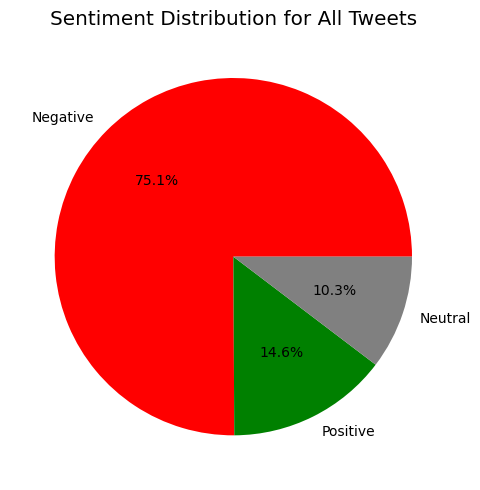

In [35]:
# Primary Analysis: Sentiment Analysis on All Tweets
# Apply sentiment analysis to all tweets
data['Sentiment'] = data['tweet'].apply(analyze_sentiment)

# Calculate sentiment distribution for all tweets
sentiment_counts_all = data['Sentiment'].value_counts()

# Plot sentiment distribution for all tweets
plt.figure(figsize=(8, 5))
sentiment_counts_all.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green', 'gray'], 
                          labels=['Negative', 'Positive', 'Neutral'], title="Sentiment Distribution for All Tweets")
plt.ylabel('')  # Hide the y-label as it's a pie chart
plt.tight_layout()
plt.show()

# Secondary Analysis: Sentiment by Location

# Filter tweets with identified locations
tweets_with_locations['Sentiment'] = tweets_with_locations['tweet'].apply(analyze_sentiment)

# Group sentiment by country for location-specific analysis
sentiment_counts_location = tweets_with_locations.groupby('locations')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Select top countries (e.g., top 5 by tweet volume) for a clearer visualization
top_countries_location = sentiment_counts_location.loc[sentiment_counts_location.sum(axis=1).nlargest(5).index]

# Plot sentiment distribution for top countries
# top_countries_location.plot(kind='bar', stacked=True, color=['red', 'green', 'gray'], figsize=(10, 6))
# plt.title("Sentiment Distribution by Country for Top 5 Locations")
# plt.xlabel("Country")
# plt.ylabel("Proportion of Sentiment")
# plt.legend(title="Sentiment", labels=['Negative', 'Positive', 'Neutral'])
# plt.tight_layout()
# plt.show()


In [36]:
# Function to display sample tweets for each sentiment category
def display_sample_tweets(data, sentiment, num_tweets=5):
    sample_tweets = data[data['Sentiment'] == sentiment].head(num_tweets)
    print(f"\nSample {sentiment} tweets ({len(sample_tweets)}) - Showing top {num_tweets}:\n")
    for i, row in sample_tweets.iterrows():
        print(f"Date: {row['Date']}, Tweet: {row['tweet']}\n")
        
# Display sample tweets for each sentiment type for all tweets
print("** Sample Tweets for All Data **")
for sentiment in ['Negative', 'Neutral', 'Positive']:
    display_sample_tweets(data, sentiment)

# Display sample tweets for each sentiment type for top 5 countries with identified locations
print("\n** Sample Tweets for Top 5 Countries by Sentiment **")
for country in top_countries_location.index:
    country_data = tweets_with_locations[tweets_with_locations['locations'] == country]
    print(f"\nCountry: {country}")
    for sentiment in ['Negative', 'Neutral', 'Positive']:
        display_sample_tweets(country_data, sentiment)


** Sample Tweets for All Data **

Sample Negative tweets (5) - Showing top 5:

Date: 2024-10-17 00:00:00, Tweet: stop this abduction politics

Date: 2024-10-16 00:00:00, Tweet: the ramifications of the controversial reinterpretation of art 63a are still ongoing with the latest abduction of pti mna miqdad khan lawlessness reigns supreme no one is safe the price the sharifs  zardaris have paid to secure themselves is our blood  honour shame

Date: 2024-10-17 00:00:00, Tweet: wahid qamber baloch a prominent baloch political leader has been missing for the past three months his political involvement in balochistan spans decades marked by numerous sacrifices his abduction raises serious concerns about efforts to suppress his ideology his steadfast

Date: 2024-10-17 00:00:00, Tweet: the abduction of baloch students from gulshaneiqbal karachi on october 16 is a blatant violation of human rights

Date: 2024-10-17 00:00:00, Tweet: in just one week eighteen baloch individuals have been forcibly 

In [37]:
import pandas as pd

# Function to create a DataFrame of sample tweets for each sentiment category
def create_sample_tweets_df(data, sentiment, num_tweets=5):
    sample_tweets = data[data['Sentiment'] == sentiment].head(num_tweets)
    return pd.DataFrame({
        'Date': sample_tweets['Date'],
        'Tweet': sample_tweets['tweet'],
        'Sentiment': sentiment
    })

# Create sample tweets DataFrame for all tweets
all_sentiment_samples = pd.DataFrame()
for sentiment in ['Negative', 'Neutral', 'Positive']:
    sentiment_df = create_sample_tweets_df(data, sentiment)
    all_sentiment_samples = pd.concat([all_sentiment_samples, sentiment_df])

# Save the sample tweets for all data as a CSV
all_sentiment_samples.to_csv("sample_tweets_all_data.csv", index=False)
print("Sample tweets for all data saved to 'sample_tweets_all_data.csv'.")

# Create sample tweets DataFrame for each top country
for country in top_countries_location.index:
    country_data = tweets_with_locations[tweets_with_locations['locations'] == country]
    country_sentiment_samples = pd.DataFrame()
    for sentiment in ['Negative', 'Neutral', 'Positive']:
        sentiment_df = create_sample_tweets_df(country_data, sentiment)
        country_sentiment_samples = pd.concat([country_sentiment_samples, sentiment_df])
    
    # Save the sample tweets for each country as a CSV
    filename = f"sample_tweets_{country.replace(' ', '_')}.csv"
    country_sentiment_samples.to_csv(filename, index=False)
    print(f"Sample tweets for {country} saved to '{filename}'.")


Sample tweets for all data saved to 'sample_tweets_all_data.csv'.
Sample tweets for afghanistan saved to 'sample_tweets_afghanistan.csv'.
Sample tweets for argentina saved to 'sample_tweets_argentina.csv'.
Sample tweets for brazil saved to 'sample_tweets_brazil.csv'.
Sample tweets for canada saved to 'sample_tweets_canada.csv'.
Sample tweets for china saved to 'sample_tweets_china.csv'.


In [38]:
all_sentiment_samples

,Date,Tweet,Sentiment
1,2024-10-17,stop this abduction politics,Negative
2,2024-10-16,the ramifications of the controversial reinter...,Negative
3,2024-10-17,wahid qamber baloch a prominent baloch politic...,Negative
4,2024-10-17,the abduction of baloch students from gulshane...,Negative
5,2024-10-17,in just one week eighteen baloch individuals h...,Negative
57,2021-11-17,hindu girl 16 was kidnapped by muhammad 31 fro...,Neutral
65,2024-08-27,18 20,Neutral
95,2024-10-16,grants to in 2019 case,Neutral
102,2024-09-17,the family has asked the courts to compel the ...,Neutral
118,2022-11-12,encuentran a menor de 13 aos que haba desapare...,Neutral


In [39]:
# Function to display sample tweets for each sentiment category
def display_sample_tweets(data, sentiment, num_tweets=20):
    sample_tweets = data[data['Sentiment'] == sentiment].head(num_tweets)
    print(f"\nSample {sentiment} tweets ({len(sample_tweets)}) - Showing top {num_tweets}:\n")
    for i, row in sample_tweets.iterrows():
        print(f"Date: {row['Date']}, Tweet: {row['tweet']}\n")
        
# Display sample tweets for each sentiment type for all tweets
print("** Sample Tweets for All Data **")
for sentiment in ['Positive']:
    display_sample_tweets(data, sentiment)

** Sample Tweets for All Data **

Sample Positive tweets (20) - Showing top 20:

Date: 2024-10-17 00:00:00, Tweet: read more

Date: 2024-10-17 00:00:00, Tweet: youtube supports the nwo cult and pedophiles 
     

dear theemmapreneur has had her account shut down after helping us survivors of 
satanic ritual abuse 

    it is real

not a lie 
we are being gaslit 

this is what we deal with all of our lives

Date: 2024-10-10 00:00:00, Tweet: hi im aj i have bipolar adhd and substance abuse disorder im also a husband son brother best friend dog dad and attorney

its   and i want you to know youre not alone we got this

Date: 2024-09-16 00:00:00, Tweet: our 2 year investigation at this rspca assured ms select flagship farm uncovered horrific abuse of cows ms have previously used this horror farm in their promotional videos and advertisements if this is the best of the best and the highest welfare dairy in the uk that

Date: 2024-09-13 00:00:00, Tweet: new mother accused of pushing her 1yea

In [40]:
# Function to display sample tweets for each sentiment category
def display_sample_tweets(data, sentiment, num_tweets=20):
    sample_tweets = data[data['Sentiment'] == sentiment].head(num_tweets)
    print(f"\nSample {sentiment} tweets ({len(sample_tweets)}) - Showing top {num_tweets}:\n")
    for i, row in sample_tweets.iterrows():
        print(f"Date: {row['Date']}, Tweet: {row['tweet']}\n")
        
# Display sample tweets for each sentiment type for all tweets
print("** Sample Tweets for All Data **")
for sentiment in ['Neutral']:
    display_sample_tweets(data, sentiment)

** Sample Tweets for All Data **

Sample Neutral tweets (20) - Showing top 20:

Date: 2021-11-17 00:00:00, Tweet: hindu girl 16 was kidnapped by muhammad 31 from fathimapuram chintalapudim west godavari dist andhra pradesh police found that she was taken to hyderabad  then to vikarabad
see the response from circle inspector to her father
ncpcr spwestgodavari hydcitypolice

Date: 2024-08-27 00:00:00, Tweet: 18                 20

Date: 2024-10-16 00:00:00, Tweet: grants   to   in 2019   case

Date: 2024-09-17 00:00:00, Tweet: the family has asked the courts to compel the ig and dci to produce mca in court

Date: 2022-11-12 00:00:00, Tweet: encuentran a menor de 13 aos que haba desaparecido  la encontraron en una habitacin en un cit  la tena un extranjero y ser imputado por sustraccin de menor  eso es rapto ya que una menor de edad y la llevo con engaos

Date: 2024-04-23 00:00:00, Tweet: this woman got kidnapped in oregon over the weekend in the middle of the night 20 april 2024 thankful

In [41]:
# Group by location (country) and count occurrences
location_counts = tweets_with_locations['locations'].value_counts()

# Display the counts
print(location_counts)

locations
israel          1224
uk               761
russia           665
gaza             436
ukraine          406
iran             298
usa              269
lebanon          206
pakistan         139
syria            128
india            123
palestine        106
china             70
iraq              62
nigeria           56
canada            55
afghanistan       44
yemen             40
france            37
jordan            31
south africa      26
germany           25
sudan             25
egypt             20
turkey            17
venezuela         15
mexico            13
libya             11
saudi arabia      10
somalia            7
colombia           7
peru               5
brazil             4
argentina          1
Name: count, dtype: int64


C:\Users\MYPC PRO L7V\AppData\Local\Temp\ipykernel_15240\417788426.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Sentiment'] = filtered_data['tweet'].apply(analyze_sentiment)


<Figure size 1000x600 with 0 Axes>

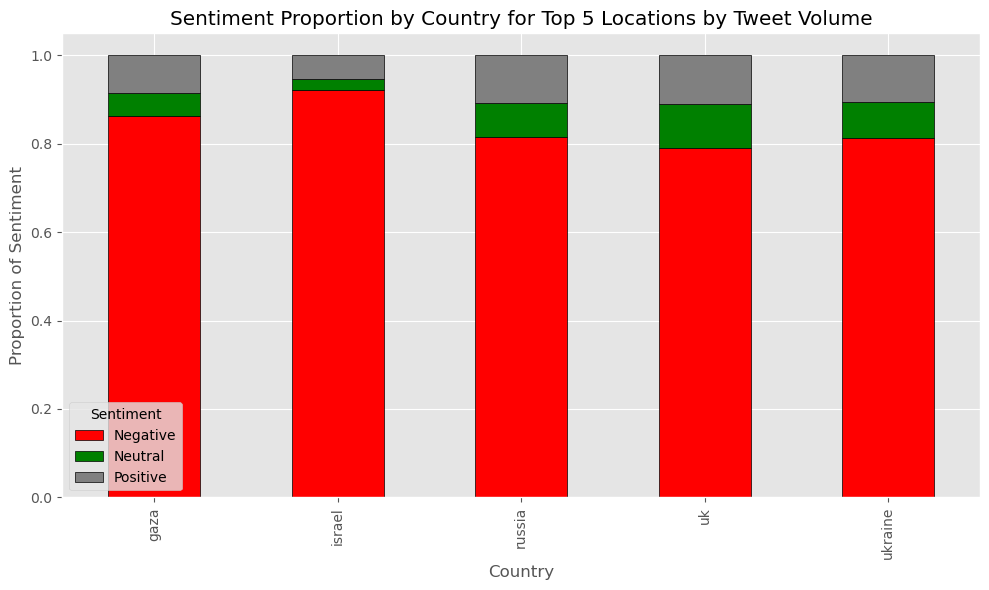

<Figure size 1000x600 with 0 Axes>

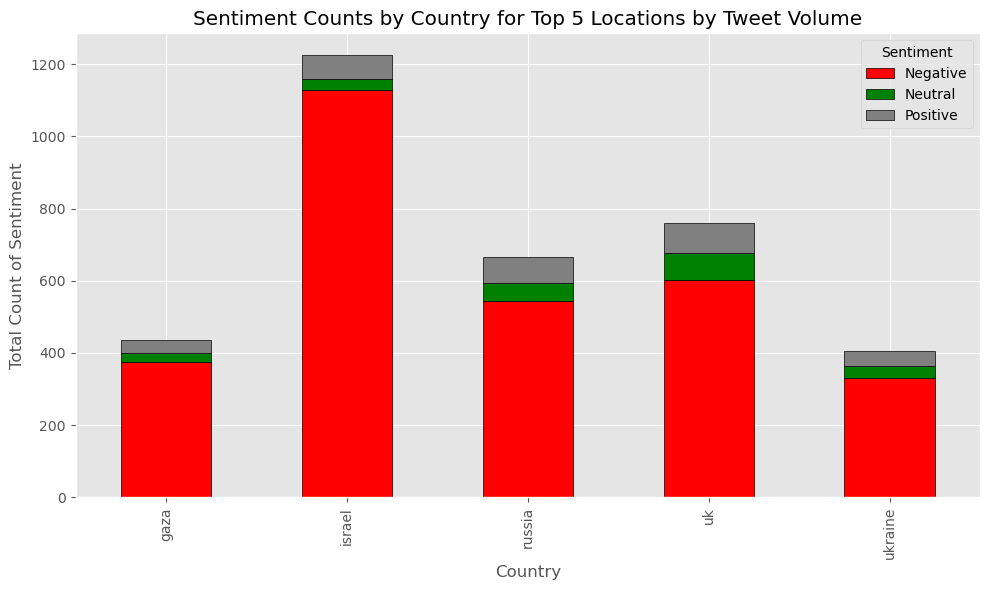

,Country,Negative (Count),Neutral (Count),Positive (Count),Negative (Proportion),Neutral (Proportion),Positive (Proportion)
0,gaza,376,23,37,0.862385,0.052752,0.084862
1,israel,1128,32,64,0.921569,0.026144,0.052288
2,russia,543,51,71,0.816541,0.076692,0.106767
3,uk,601,77,83,0.789750,0.101183,0.109067
4,ukraine,330,33,43,0.812808,0.081281,0.105911


In [42]:
# Define top five countries by tweet count for sentiment analysis
top_countries_by_volume = location_counts.nlargest(5).index

# Filter data for these top five countries
filtered_data = tweets_with_locations[tweets_with_locations['locations'].isin(top_countries_by_volume)]

# Apply sentiment analysis to filtered data
filtered_data['Sentiment'] = filtered_data['tweet'].apply(analyze_sentiment)

# Group sentiment by country and calculate counts and proportions
sentiment_counts_location = (
    filtered_data.groupby('locations')['Sentiment']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

# Get raw counts (non-normalized) for each sentiment category
sentiment_counts_location_sum = (
    filtered_data.groupby('locations')['Sentiment']
    .value_counts()
    .unstack(fill_value=0)
)

# Plot sentiment distribution (proportion) for the top five countries
plt.figure(figsize=(10, 6))
sentiment_counts_location.plot(
    kind='bar', stacked=True, color=['red', 'green', 'grey'], figsize=(10, 6), edgecolor='black'
)
plt.title("Sentiment Proportion by Country for Top 5 Locations by Tweet Volume")
plt.xlabel("Country")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

# Plot sentiment distribution (count) for the top five countries
plt.figure(figsize=(10, 6))
sentiment_counts_location_sum.plot(
    kind='bar', stacked=True, color=['red', 'green', 'grey'], figsize=(10, 6), edgecolor='black'
)
plt.title("Sentiment Counts by Country for Top 5 Locations by Tweet Volume")
plt.xlabel("Country")
plt.ylabel("Total Count of Sentiment")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

# Display counts and proportions in a single DataFrame for enriched analysis
enriched_sentiment_analysis = sentiment_counts_location_sum.merge(
    sentiment_counts_location, left_index=True, right_index=True, suffixes=('_count', '_proportion')
)

# Show the DataFrame
enriched_sentiment_analysis.reset_index(inplace=True)
enriched_sentiment_analysis.columns = ['Country', 'Negative (Count)', 'Neutral (Count)', 'Positive (Count)',
                                       'Negative (Proportion)', 'Neutral (Proportion)', 'Positive (Proportion)']
enriched_sentiment_analysis


<Figure size 1000x600 with 0 Axes>

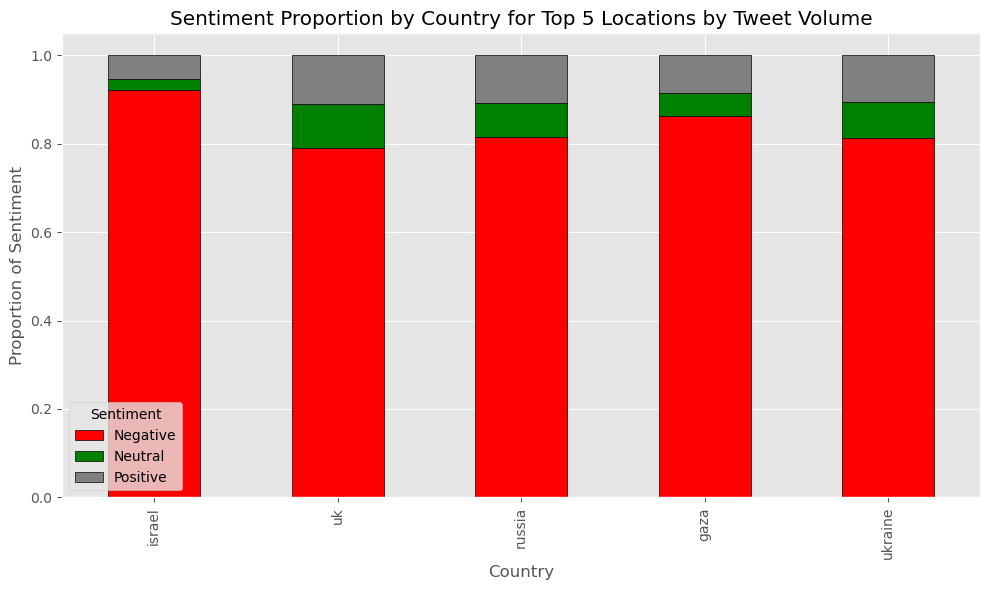

<Figure size 1000x600 with 0 Axes>

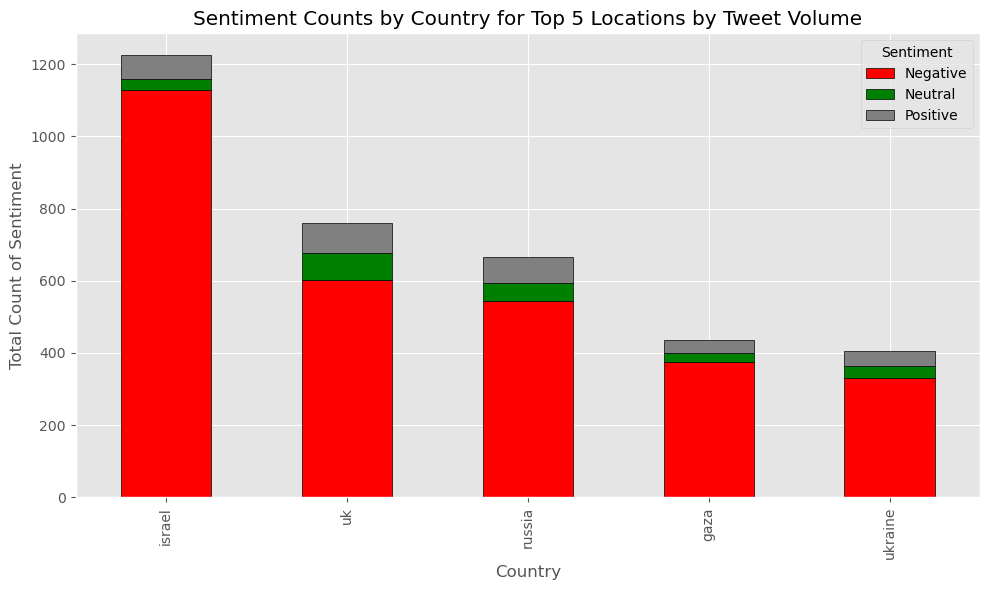

In [43]:
# Sort the top countries by total tweet count (from highest to lowest)
top_countries_location = sentiment_counts_location_sum.sum(axis=1).sort_values(ascending=False).index
sentiment_counts_location = sentiment_counts_location.loc[top_countries_location]
sentiment_counts_location_sum = sentiment_counts_location_sum.loc[top_countries_location]

# Plot sentiment distribution (proportion) for the top five countries, sorted by tweet volume
plt.figure(figsize=(10, 6))
sentiment_counts_location.plot(
    kind='bar', stacked=True, color=['red', 'green', 'grey'], figsize=(10, 6), edgecolor='black'
)
plt.title("Sentiment Proportion by Country for Top 5 Locations by Tweet Volume")
plt.xlabel("Country")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

# Plot sentiment distribution (count) for the top five countries, sorted by tweet volume
plt.figure(figsize=(10, 6))
sentiment_counts_location_sum.plot(
    kind='bar', stacked=True, color=['red', 'green', 'grey'], figsize=(10, 6), edgecolor='black'
)
plt.title("Sentiment Counts by Country for Top 5 Locations by Tweet Volume")
plt.xlabel("Country")
plt.ylabel("Total Count of Sentiment")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


In [44]:
import pandas as pd

# Function to create a DataFrame with sample tweets for each sentiment category
def get_sample_tweets_df(data, sentiment, country, num_tweets=5):
    sample_tweets = data[(data['Sentiment'] == sentiment) & (data['locations'] == country)].head(num_tweets)
    return sample_tweets[['Date', 'locations', 'tweet']].rename(columns={'tweet': 'Tweet', 'locations': 'Country', 'Date': 'Date'})

# Initialize an empty DataFrame to hold the samples
sample_tweets_df = pd.DataFrame(columns=['Date', 'Country', 'Tweet', 'Sentiment'])

# Gather sample tweets for each sentiment for top 5 countries by tweet volume
for country in top_countries_location:
    for sentiment in ['Negative', 'Neutral', 'Positive']:
        sample_df = get_sample_tweets_df(tweets_with_locations, sentiment, country)
        sample_df['Sentiment'] = sentiment  # Add sentiment as a column
        sample_tweets_df = pd.concat([sample_tweets_df, sample_df], ignore_index=True)

# Save the DataFrame to a CSV file
sample_tweets_df.to_csv("sample_tweets_by_sentiment_and_country.csv", index=False)
print("Sample tweets saved to 'sample_tweets_by_sentiment_and_country.csv'")


Sample tweets saved to 'sample_tweets_by_sentiment_and_country.csv'


In [45]:
pd.set_option('display.max_rows', None)

In [46]:
sample_tweets_df

,Date,Country,Tweet,Sentiment
0,2024-10-17,israel,28 palestinians including children and women w...,Negative
1,2024-10-06,israel,syrian defense ministry israel carried out an ...,Negative
2,2024-10-08,israel,idf new images of the remnants of iranian ball...,Negative
3,2024-10-14,israel,four israeli soldiers are dead and dozens are ...,Negative
4,2024-10-10,israel,rt palestinechron syrian defense ministry at a...,Negative
5,2024-10-14,israel,the israeli army says air raid sirens were act...,Neutral
6,2023-10-14,israel,palestinianisraeli border \n\nmassive mechaniz...,Neutral
7,2024-10-01,israel,reuters\n\nus bases would be target if us join...,Neutral
8,2024-09-26,israel,join amb david hale rmslim eranetzion katulis...,Neutral
9,2024-03-02,israel,again the israeli army targets civilians on al...,Neutral
